### Max-cut with visualization

In [1]:
import itertools
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

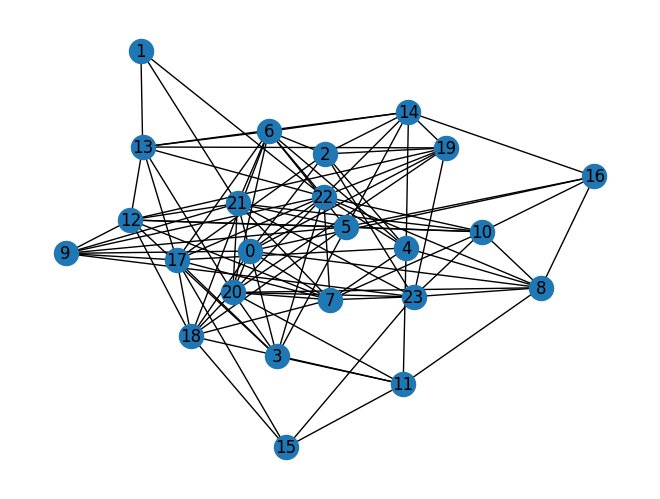

In [ ]:
def sample_graph(n: int = 8, p: float = 0.4, seed: int | None = None):
    """Generate a random undirected Erdős–Rényi graph G(n, p)."""
    rng = random.Random(seed)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for u in G.nodes:
        for v in G.nodes:
            if u < v and rng.random() < p:
                w = rng.randint(1, 10)          # random positive edge weight
                G.add_edge(u, v, weight=w)
    return G

G = sample_graph(24, 0.35, seed=42)
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
def maxcut_bruteforce(G: nx.Graph):
    """
    Exact Max-Cut via exhaustive enumeration.
    """
    best_value, best_cut = -math.inf, None
    nodes = list(G.nodes)
    for mask in range(1 << len(nodes)):           # 2^n partitions
        S = {nodes[i] for i in range(len(nodes)) if mask & (1 << i)}
        T = set(nodes) - S
        value = sum(
            data["weight"]
            for (u, v, data) in G.edges(data=True)
            if (u in S and v in T) or (u in T and v in S)
        )
        if value > best_value:
            best_value, best_cut = value, (S, T)
    return best_value, best_cut


In [ ]:
def maxcut_greedy(G: nx.Graph, iters: int = 5):
    """
    Heuristic Max-Cut (greedy-swap local search).
    """
    nodes = list(G.nodes)
    best_val, best_cut = -math.inf, None

    for _ in range(iters):
        # initial random split: half of the vertices in S
        S = set(random.sample(nodes, k=len(nodes) // 2))
        improved = True

        while improved:
            improved = False
            for v in nodes:
                # compute gain/loss if we flip vertex v to the other side
                delta = 0
                for u, w in G[v].items():
                    if (v in S) == (u in S):
                        delta += w["weight"]   # edge would move into the cut
                    else:
                        delta -= w["weight"]   # edge would leave the cut

                if delta > 0:                  # flipping v is beneficial
                    S.symmetric_difference_update([v])
                    improved = True

        T = set(nodes) - S
        value = sum(
            d["weight"]
            for u, v, d in G.edges(data=True)
            if (u in S and v in T) or (u in T and v in S)
        )
        if value > best_val:
            best_val, best_cut = value, (S, T)

    return best_val, best_cut


In [ ]:
def draw_cut(G: nx.Graph, cut):
    """
    Visualize a Max-Cut partition.
    """
    S, T = cut
    pos = nx.spring_layout(G, seed=1)
    plt.figure(figsize=(5, 5))

    # Draw the two vertex sets in different colors
    nx.draw_networkx_nodes(G, pos, nodelist=S, node_color="tab:blue",   label="S")
    nx.draw_networkx_nodes(G, pos, nodelist=T, node_color="tab:orange", label="T")

    # Split edges into “inside” vs. “crossing the cut”
    cut_edges  = [(u, v) for u, v in G.edges if (u in S) ^ (v in S)]   # XOR → crossing
    keep_edges = [(u, v) for u, v in G.edges if not ((u in S) ^ (v in S))]

    # Draw non-cut edges faint, cut edges thick & red
    nx.draw_networkx_edges(G, pos, edgelist=keep_edges, alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=cut_edges, width=2, edge_color="red")

    nx.draw_networkx_labels(G, pos)
    plt.title(f"Max-Cut = {sum(G[u][v]['weight'] for u, v in cut_edges)}")
    plt.axis("off")
    plt.legend()
    plt.show()


Brute force: 377


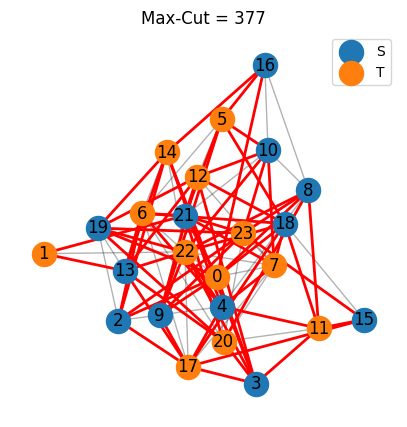

Greedy-Swap: 377


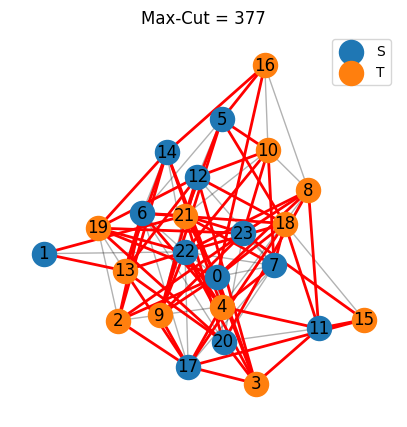

In [12]:
val_exact, cut_exact = maxcut_bruteforce(G)
print("Brute force:", val_exact)
draw_cut(G, cut_exact)

val_fast, cut_fast = maxcut_greedy(G, iters=20)
print("Greedy-Swap:", val_fast)
draw_cut(G, cut_fast)
